## Propagación de Restricciones: Inferencia en CSPs

Recordando la búsqueda que hemos estudiado hasta ahora, un algoritmo de búsqueda puede hacer una sola cosa: buscar. En cambio, puesto que la formulación de los CSPs involucran más conocimiento sobre el problema podemos hacer búsqueda y además, **inferir** al **propagar las restricciones**. Esta propagación utiliza las restricciones para reducir el número de movimientos legales para una variable, que a su vez puede reducir los valores legales para otra variable y así *ad infinitum*. Esta inferencia puede ser utilizada antes o durante el proceso de búsqueda. Algunas veces este preprocesamiento puede resolver todo el problema y por lo tanto se ahorra el proceso de búsqueda.

La idea clave es **consistencia local**. Si tratamos a cada variable como un nodo en un grafo y cada restricción binaria como un arco, entonces el proceso de enforzar consistencia local en cada parte del grafo ocasiona que valores no consistentes sean eliminados en todo el grafo. 

### Consistencia de nodo

Un nodo es **nodo-consistente** (recuerde que el nodo representa una variable en el grafo de restricciones) si todos los valores dentro del dominio de la variable satisfacen las restricciones unarias sobre dicho nodo. Decimos que una red es nodo-consistente si cada uno de los nodos que conforman el grafo son nodo-consistente. Puesto que es posible transformar cada restricción *n*-naria a una restricción binaria, no se suele enforzar consistencia de nodo para toda la red.

Ejemplo:

Sea el CSP:

$X = \{a, b, c\}$

$D_{i} = \{ (1, 2, 3) \}$

$C = \{ \langle (a), a \neq 1 \rangle, \langle (b), b \neq 2 \rangle, \langle (c), c \neq 3 \rangle \}$

$\rightarrow$ Enforzando consistencia de nodo para la red:

$D_{a} = \{ 2, 3 \}$
$D_{b} = \{ 1, 3 \}$
$D_{c} = \{ 1, 2 \}$


### Consistencia de Arco

Una variable en un CSP es **arco-consistente** si todos los valores dentro del dominio de la variable satisfacen las restricciones binarias impuestas sobre dicha variable. 

Ejemplo:

Sea el CSP:

$X = \{a, b\}$

$D_{i} = \{ (0, 1, 2, ..., 9) \}$

$C = \{ \langle (a, b), b = a^2 \rangle \}$

Generando el dominio de la restricción:

$C = \{ (0, 0), (1, 1), (2, 4), (3, 9) \}$

Para hacer $a$ arco-consistente con $b$, reducimos el dominio de $a$ a $D_a = \{ 0, 1, 2, 3\}$. Si también hacemos a $b$ arco-consistente con $a$, entonces el dominio de $b$ se vuelve $D_b = \{ 0, 1, 4, 9 \}$ y así todo el CSP es arco-consistente.

El algoritmo más popular para consistencia de arco se llama $AC-3$. Para hacer cada variable arco-consistente, el algoritmo $AC-3$ mantiene una cola de arcos a considerar. Inicialmente la cola contiene todos los arcos en el CSP. $AC-3$ entonces saca de la cola un arco arbitrario $(X_i, X_j)$ y vuelve a $X_i$ arco-consistente con respecto a $X_j$. Si en este proceso el dominio de $X_i$ $D_i$ se mantiene intacto, el algoritmo simplemente se mueve al siguiente arco en la cola. En cambio, si el proceso modifica a $D_i$, entonces agregamos a la cola de todos los arcos el arco $(X_k, X_i)$ donde $X_k$ es un vecino de $X_i$. Es necesario hacer esto porque el cambio en $D_i$ pudo habilitar reducciones en el dominio $D_k$. Si $D_i$ es modificado y resulta que no queda nada dentro del dominio, significa que el CSP no tiene solución consistente, y AC-3 puede devolver *falló* de forma inmediata. De otra manera, seguimos verificando, intentando remover valores de los dominios de las variables hasa que no queden más arcos en la cola. Tras realizar todo este proceso tenemos un CSP equivalente al CSP original, pero con la crítica diferencia de que la búsqueda en el CSP con dominios reducidos generalmente es más rápida que en el CSP original.

Es posible extender la noción de consistencia arcos para manejar restricciones *n*-narias en lugar de binarias; a esto se le conoce como **consistencia de arco generalizada**. $X_i$ es arco-consistente generalizado con respecto a los miembros de la restricción si para cada valor $v$ dentro del dominio de $X_i$ existe una tupla de valores que es miembro de la restricción, tiene todos sus valores tomados de los dominios de las variables correspondientes, y tiene su componente $X_i$ igual a $v$.

Ejemplo:

Sea el CSP:

$X = \{ x, y, z \}$

$D_i = \{0, 1, 2, 3\}$

$C = \{ \langle (x, y, z), x < y < z \rangle \}$

Entonces para volver a $x$ consistente con la restricción $(x, y, z)$, tendríamos que elimiar $2$ y $3$ del dominio de $x$ puesto que la restricción no puede ser satisfecha cuando $x$ toma los valores de $2$ o $3$. Verifique esto expresando la restricción $C$ de forma explícita.

In [1051]:
Di = {0, 1, 2, 3}
C = {(vi, vj, vk) for vi in Di for vj in Di for vk in Di if vi < vj < vk}

print(C)

{(0, 1, 2), (0, 2, 3), (1, 2, 3), (0, 1, 3)}


Allan Mackworth en su artículo *Consistency in Networks of Relations* <a href=https://www.cs.ubc.ca/~mack/Publications/b2hd-AI77.html>[1]</a>; publicado por el departamento de Ciencias de la Computación de la Universidad de British Columbia, Canadá en 1977; describe el algoritmo NC que enforza consistencia de nodos, los algoritmos AC-1, AC-2 y AC-3 para enforzar consistencia de arco, los algoritmos PC-1 y PC-2 para enforzar consistencia de caminos, y dos versiones de un algoritmo nombrado Revise que elimina valores de los dominios de las variables pasadas como argumentos.

A continuación se presenta el algoritmo AC-3 y Revise para consistencia de arcos:

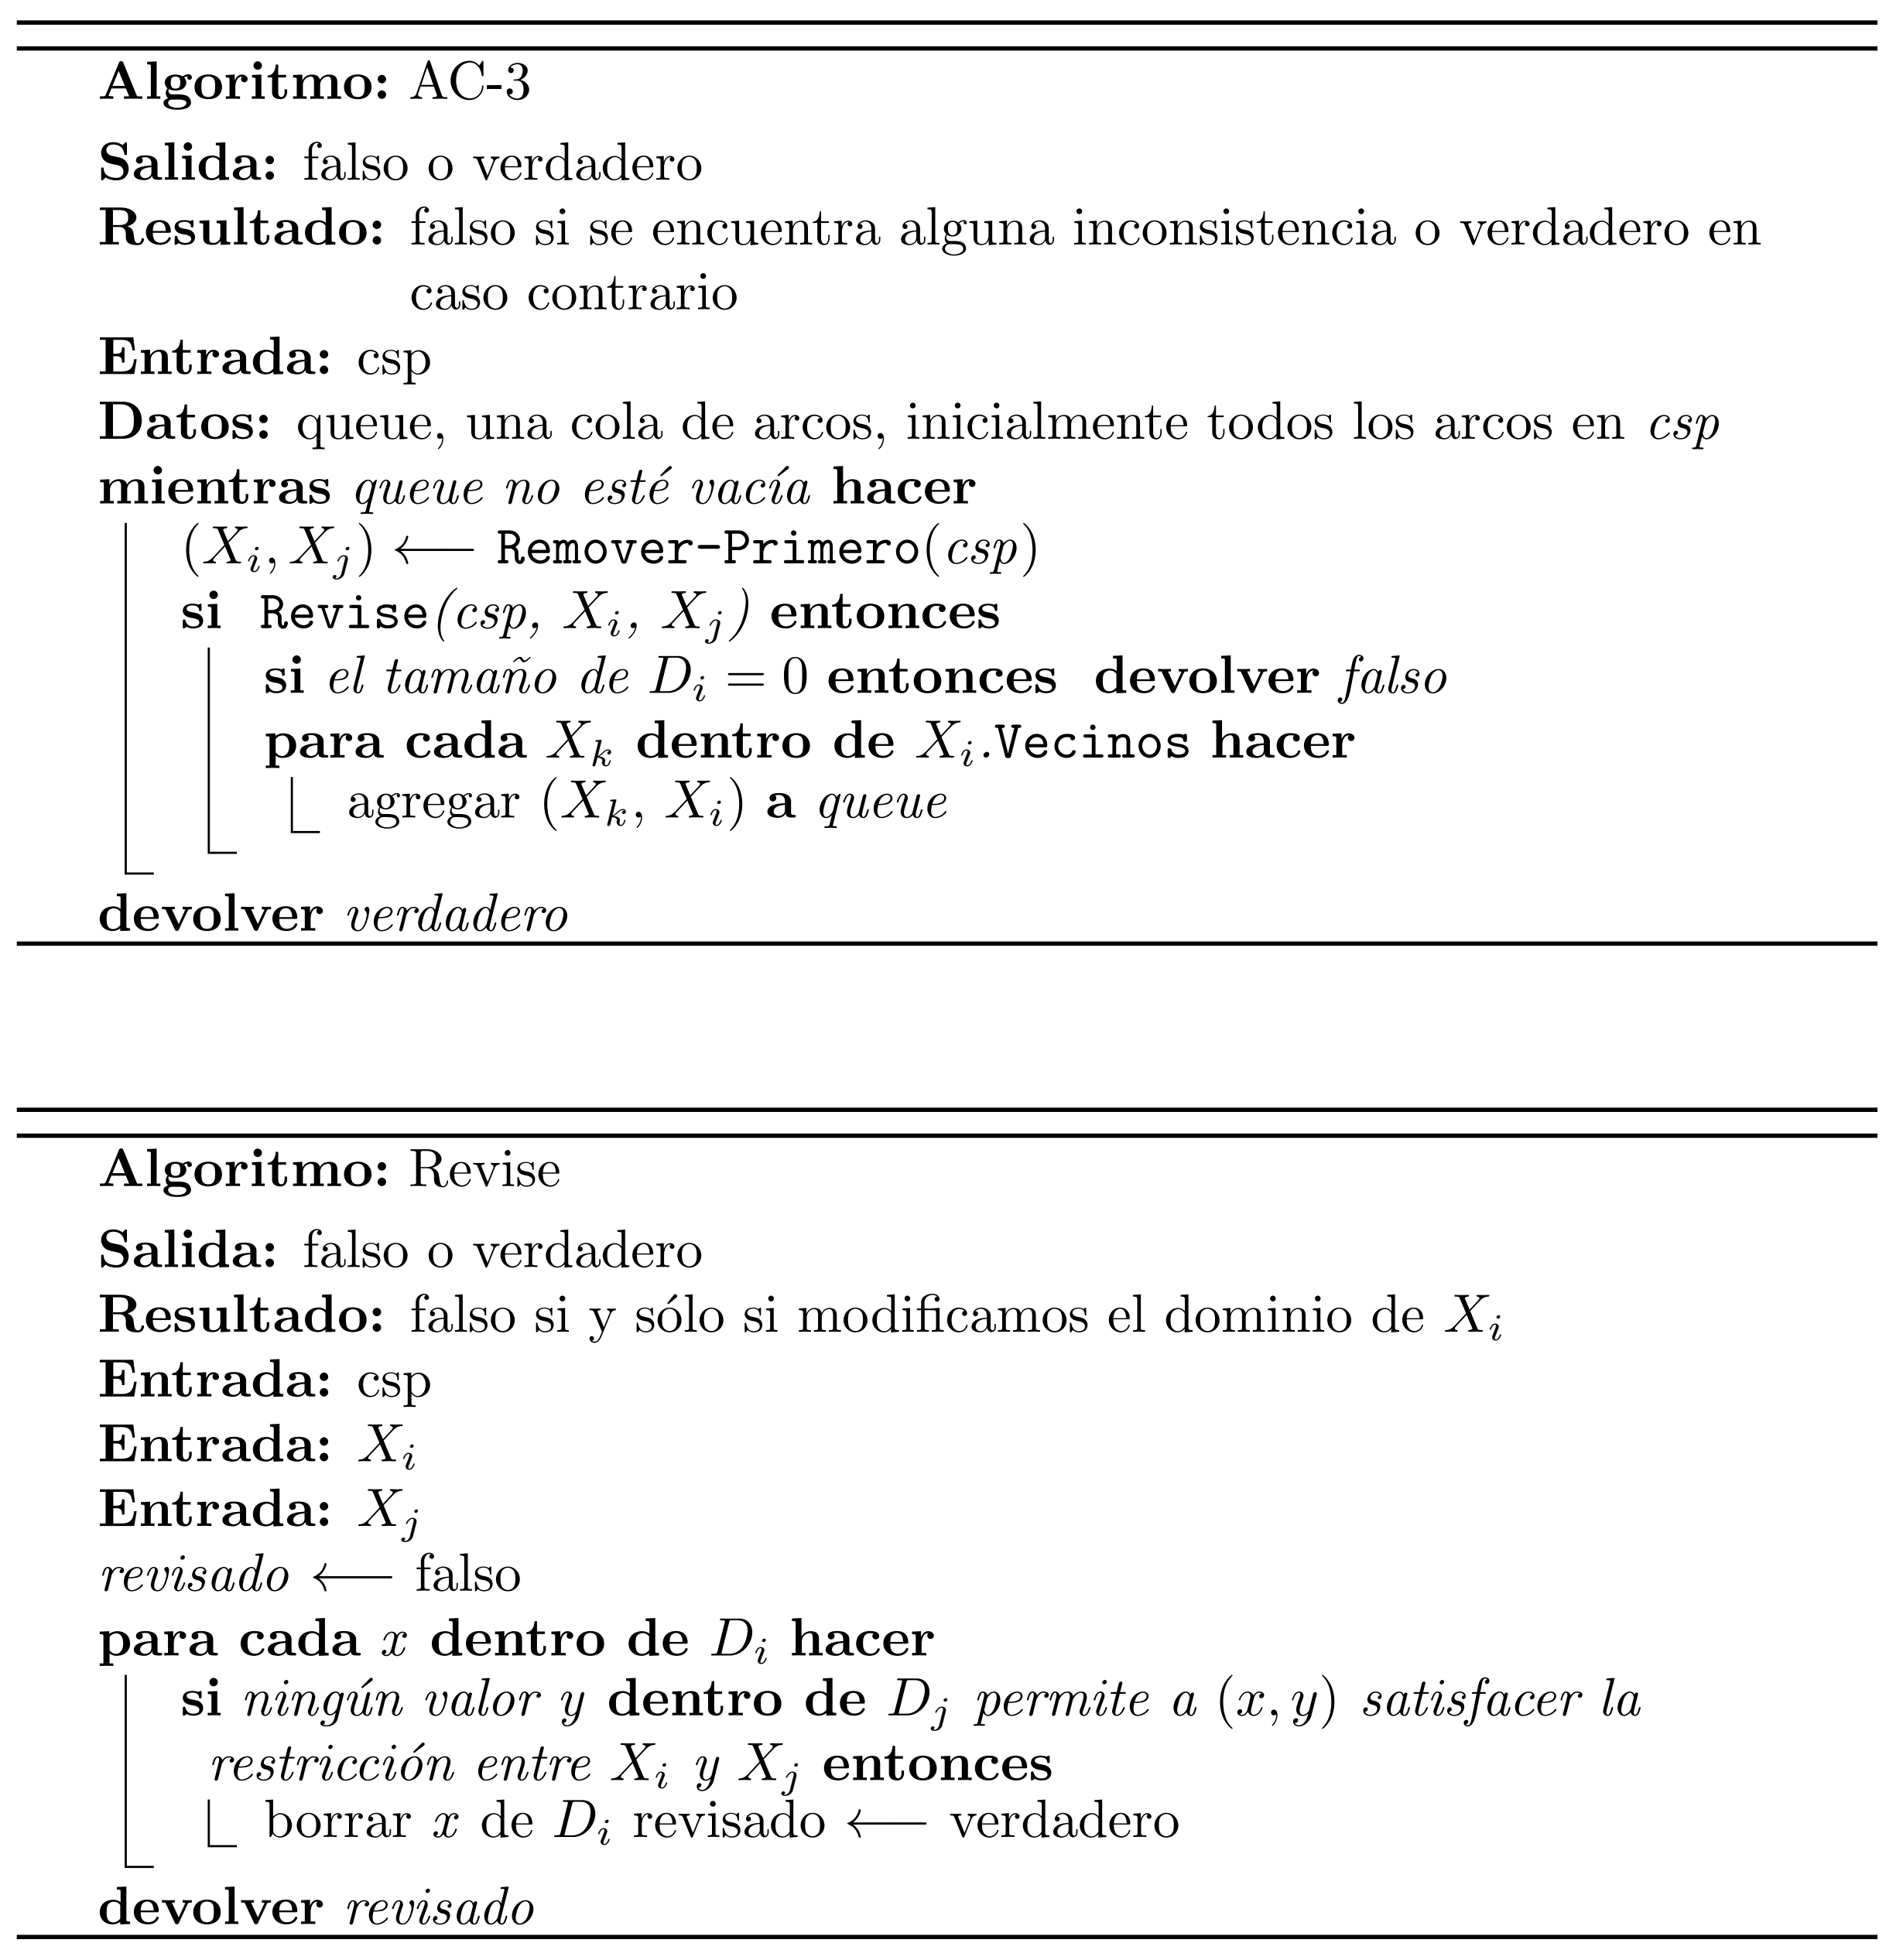

## Consistencia de Camino

Para muchos casos la consistencia de arco nos sirve mucho, pues nos permite saber si el problema tiene solución, reduce el tiempo requerido para solucionar el CSP, o soluciona todo el CSP. Pero para otras redes, la consistencia de arcos falla en realizar suficientes inferencias. Si consideramos el problema de coloreo de mapas para el caso de Australia, pero ahora con sólo dos colores, encontramos que consistencia de arco no puede hacer algo, pues cada variable ya es arco-consistente (Si NT es 'rojo', entonces NT puede tomar 'azul' y viceversa). Claramente el problema no se puede resolver, pues $SA$ es compartido por $WA, NT, Q, NSW$ y $V$.

Para detectar este tipo de fallos de forma temprana, es necesario realizar una mejor inferencia y por lo tanto necesitamos una noción más fuerte de consistencia. **Consistencia de Camino** o **Path consistency** realiza esta inferencia al considerar restricciones implicitas que son inferidas al observar tres variables.

Un conjunto de dos variables $\{X_i, X_j\}$ es camino-consistente con respecto a una tercer variable $X_m$ si, para cada asignación $\{ X_i = v_i, X_j = v_k \}$ consistente con las restricciones en $\{X_i, X_k\}$, existe una asignación a $X_m$ que satisface las restricciones en $\{ X_i, X_m \}$ y $\{X_m, X_j\}$.

Ejemplo:

Sea el CSP:

$X = \{ X_i, X_j, X_m \}$

$D_i = \{ 0, 1, 2 \}$

$C = \{ 
    \langle (X_i, X_j), X_i + X_j  = 2\rangle,
    \langle (X_j, X_m), X_j - X_m = 0 \rangle,
    \langle (X_i, X_m), X_m + X_i = 1 \rangle
\}$

$\rightarrow$ Haciendo $X_i$ arco-consistente con X_j y viceversa:

$D_i = \{ 0, 1, 2 \}, D_j = \{ 0, 1, 2 \}$

$C(X_i, X_j) = \{ (0,2), (1, 1), (2, 0) \}$

$\rightarrow$ Buscando algún $v_l$ dentro de $D_m$ tal que sea consistente con las asignaciones consistentes a $X_i$ y $X_j$:

$(0, 2) \leftarrow D_m\{ 0, 1, 2\}$ se vuelve $D_m = \emptyset$

$(1, 1) \leftarrow D_m\{ 0, 1, 2\}$ se vuelve $D_m = \emptyset$

$(2, 0) \leftarrow D_m\{ 0, 1, 2\}$ se vuelve $D_m = \emptyset$

$\therefore$ no existe $v_l$ tal que sea consistente con asignaciones consistentes en $X_i$ y $X_j$, lo que implica que el CSP no tiene solución.

El algoritmo PC-2 propuesto por Mackworth es muy similar a AC-3. Se muestra a continuación:

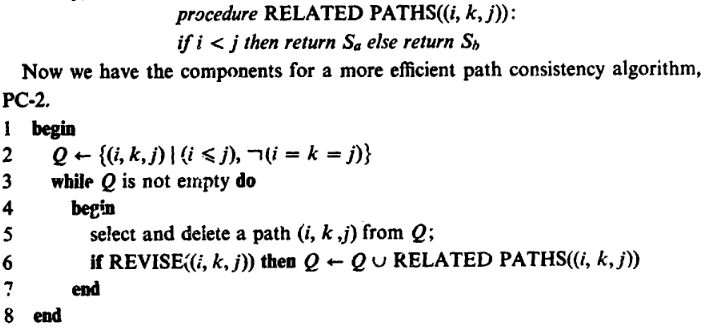

## $K-$consistencia

Un CSP es **$k-$consistente** si, para cada conjunto de $k-1$ variables y para cualquier asignación consistente a esas variables, un valor consistente siempre puede ser asignado a cualquier $k-$ésima variable. Este principio es general; observe como $k=1-$consistencia es consistencia de nodo, $k=2-$consistencia es consistencia de arco y $k=3-$consistencia es consistencia de camino para CSPs binarios.

Un CSP es **fuertemente $k-$consistente** si es $k-$consistente y además $(k-1)-$consistente, $(k-2)-$consistente, ..., $1-$consistente.